# [실습] 네이버 웹툰홈에서 연령대별/ 성별 실시간 인기만화 크롤링해서 가져오기

In [2]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# seaborn lib add
import seaborn as sns

from glob import glob

%matplotlib inline

import json

import warnings
warnings.filterwarnings(action = 'ignore') 

from datetime import date, datetime, timedelta
from dateutil.parser import parse

print("numpy version:",np.__version__) 
print("pandas version:",pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

numpy version: 1.20.1
pandas version: 1.2.4


In [3]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError
import requests
import re
from selenium import webdriver
import time

크롤링할 부분


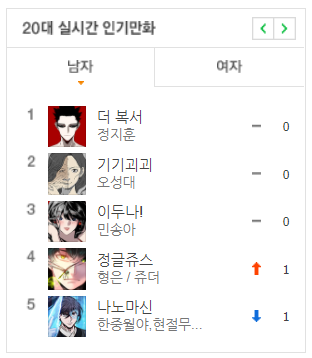

In [4]:
from PIL import Image
print('크롤링할 부분')
Image.open('C:/Users/whgud/img/네이버웹툰_실시간_인기만화.png')

## 목표 
- 연령대별/성별 실시간 인기 만화 가져오기
- 각 웹툰의 제목과 짧은 설명 가져오기  

In [5]:
path = 'C:/Users/whgud/driver/chromedriver_win32/chromedriver.exe'
driver = webdriver.Chrome(path)
driver.get('https://comic.naver.com/webtoon/weekday')

In [6]:
driver.find_element_by_css_selector('#recommand_ageImg').get_attribute('title')

'10대 실시간 인기만화'

In [45]:
man = driver.find_element_by_xpath('//*[@id="recommandWebtoonRankMTabOver"]/a')
woman =driver.find_element_by_xpath('//*[@id="recommandWebtoonRankWTabOver"]/a')
webtoonbtn = driver.find_element_by_xpath('//*[@id="recommand_link_'+str(idx)+'"]')
next_btn = driver.find_element_by_css_selector('#recommandWebtoonRankRightTabClick')

In [60]:
for i in range(0,3):
    age = driver.find_element_by_css_selector('#recommand_ageImg').get_attribute('title')
    man = driver.find_element_by_xpath('//*[@id="recommandWebtoonRankMTabOver"]/a')
    woman =driver.find_element_by_xpath('//*[@id="recommandWebtoonRankWTabOver"]/a')
    

    next_btn = driver.find_element_by_css_selector('#recommandWebtoonRankRightTabClick')
    print(age,"(남자)")
    
    for idx in range(0,5): 
        title = driver.find_element_by_xpath('//*[@id="recommand_titleName_'+str(idx)+'"]')
        print('{}위 : {}'.format(idx+1,title.text))
           
    woman.click()
    print()
    print(age,"(여자)")
    
    for idx1 in range(0,5):
        title = driver.find_element_by_xpath('//*[@id="recommand_titleName_'+str(idx1)+'"]')
        print('{}위 : {}'.format(idx1+1,title.text))
        
    next_btn.click()
    time.sleep(3)
    
    print()
 


    
#    
    #time.sleep(2)

10대 실시간 인기만화 (남자)
1위 : 더 복서
2위 : 이두나!
3위 : 정글쥬스
4위 : 기기괴괴
5위 : 묵시의 인플루언서

10대 실시간 인기만화 (여자)
1위 : 연애혁명
2위 : 독립일기
3위 : 노답소녀
4위 : 오빠세끼
5위 : 하드캐리

20대 실시간 인기만화 (남자)
1위 : 연애혁명
2위 : 독립일기
3위 : 노답소녀
4위 : 화이트 블러드
5위 : 오빠세끼

20대 실시간 인기만화 (여자)
1위 : 연애혁명
2위 : 독립일기
3위 : 노답소녀
4위 : 화이트 블러드
5위 : 오빠세끼

30대 실시간 인기만화 (남자)
1위 : 완벽한 결혼의 정석
2위 : 불편한 관계
3위 : 여신강림
4위 : 시월드 판타지
5위 : THE 런웨이

30대 실시간 인기만화 (여자)
1위 : 완벽한 결혼의 정석
2위 : 불편한 관계
3위 : 여신강림
4위 : 시월드 판타지
5위 : THE 런웨이



# 결론 
오늘 배운 find_element_by_xpath()함수를 활용해서 크롤러를 만들었다.
자동으로 원하는 데이터를 크롤링해오는 실습을 진행해봤다.
xpath를 활용하는 부분이 처음 할때는 어느 부분의 path를 가져와야할지도 헷갈렸고,
페이지가 변경될때마다 어떻게 적용될지 비교해서 적절한 값을 넣어줘야 하는게 어려웠다.
여러번의 시도끝에 원하는 데이터를 자동으로 크롤링 해올 수 있었다. 작가와 짧은 설명부분도 크롤링해오고 싶었지만 그부분은 좀 더 연습이 필요할 것 같다.
익숙해질 수 있게 더 많은 사이트에서 다양한 데이터를 크롤링해올 수 있는 연습을 많이 해봐야겠다.